In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Load in data set

In [2]:
Happiness = pd.read_csv("C:/Users/aayom/OneDrive/data science/final project/world-happiness-report-2015-2022-cleaned.csv")
Happiness

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,142,143,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,144,145,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022


* There are some data missing, and some values need to be reformatted from commas to decimal points. These data wrangling needs to be done specifically for the year 2022.

## Data Cleaning and Wrangling

### Replacing commas with decimal values

In [3]:
Happiness["Happiness Score"]=Happiness["Happiness Score"].str.replace(',','.')
Happiness["Economy (GDP per Capita)"]=Happiness["Economy (GDP per Capita)"].str.replace(',','.')
Happiness["Family (Social Support)"]=Happiness["Family (Social Support)"].str.replace(',','.')
Happiness["Health (Life Expectancy)"]=Happiness["Health (Life Expectancy)"].str.replace(',','.')
Happiness["Freedom"]=Happiness["Freedom"].str.replace(',','.')
Happiness["Generosity"]=Happiness["Generosity"].str.replace(',','.')
Happiness["Trust (Government Corruption)"]=Happiness["Trust (Government Corruption)"].str.replace(',','.')
Happiness

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana*,-,3.471,1.503,0.815,0.280,0.571,0.102,0.012,2022
1225,142,143,Rwanda*,-,3.268,0.785,0.133,0.462,0.621,0.544,0.187,2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.105,0.106,2022
1227,144,145,Lebanon,Middle East and Northern Africa,2.955,1.392,0.498,0.631,0.103,0.034,0.082,2022


* Some countries in the year 2022 has an asterisk in front of them, and some have missing regions. We would correctly input region data for these countries, and remove the asterisks in front of the countries.

In [4]:
np.unique(Happiness.Region)

array(['-', 'Australia and New Zealand', 'Central and Eastern Europe',
       'Commonwealth of Independent States', 'East Asia', 'Eastern Asia',
       'Latin America and Caribbean', 'Middle East and North Africa',
       'Middle East and Northern Africa', 'North America',
       'North America and ANZ', 'South Asia', 'Southeast Asia',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

In [5]:
Happiness[Happiness.Region == "-"]

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
347,32,33,Taiwan Province of China,-,6.421999931,1.433626533,1.384565353,0.793984234,0.361466587,0.063829236,0.258360475,2017
364,49,50,Belize,-,5.955999851,0.907975316,1.081417799,0.450191766,0.547509372,0.096581072,0.240015641,2017
385,70,71,"Hong Kong S.A.R., China",-,5.472000122,1.551674843,1.262790918,0.943062425,0.490968645,0.293933749,0.374465793,2017
407,92,93,Somalia,-,5.151000023,0.022643184,0.721151352,0.113989137,0.602126956,0.282410324,0.291631311,2017
425,110,111,Namibia,-,4.573999882,0.964434326,1.098470807,0.338611811,0.520303547,0.093146972,0.077133745,2017
461,146,147,South Sudan,-,3.59100008,0.397248626,0.601323128,0.163486004,0.147062436,0.116793513,0.285670817,2017
506,37,38,Trinidad & Tobago,-,6.192,1.223,1.492,0.564,0.575,0.019,0.171,2018
517,48,49,Belize,-,5.956,0.807,1.101,0.474,0.593,0.089,0.183,2018
526,57,58,Northern Cyprus,-,5.835,1.229,1.211,0.909,0.495,0.154,0.179,2018
566,97,98,Somalia,-,4.982,0,0.712,0.115,0.674,0.282,0.238,2018


* Remove all countries with asterisks in front of them

In [6]:
Happiness[['Country']] = Happiness[['Country']].replace({'\*': ''}, regex=True)
Happiness

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana,-,3.471,1.503,0.815,0.280,0.571,0.102,0.012,2022
1225,142,143,Rwanda,-,3.268,0.785,0.133,0.462,0.621,0.544,0.187,2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.105,0.106,2022
1227,144,145,Lebanon,Middle East and Northern Africa,2.955,1.392,0.498,0.631,0.103,0.034,0.082,2022


### Input appropriate regions for countries with missing regions

* Input regions based on the continent, disregarding the specific region in that continent. This is to allow lesser region categories for statistical analysis and uniformity of the regions 

In [7]:
Happiness.loc[Happiness.Country == "Rwanda","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Taiwan Province of China","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Belize","Region"] = "America"
Happiness.loc[Happiness.Country == "Hong Kong S.A.R., China","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Somalia","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Namibia","Region"] = "Africa"
Happiness.loc[Happiness.Country == "South Sudan","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Trinidad & Tobago","Region"] = "America"
Happiness.loc[Happiness.Country == "Northern Cyprus","Region"] = "Europe"
Happiness.loc[Happiness.Country == "North Macedonia","Region"] = "Europe"
Happiness.loc[Happiness.Country == "Gambia","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Luxembourg","Region"] = "Europe"
Happiness.loc[Happiness.Country == "Czechia","Region"] = "Europe"
Happiness.loc[Happiness.Country == "Guatemala","Region"] = "America"
Happiness.loc[Happiness.Country == "Kuwait","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Belarus","Region"] = "Europe"
Happiness.loc[Happiness.Country == "Turkmenistan","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Libya","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Azerbaijan","Region"] = "Europe and Asia"
Happiness.loc[Happiness.Country == "Liberia","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Congo","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Niger","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Comoros","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Palestinian Territories","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Eswatini, Kingdom of","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Madagascar","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Chad","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Yemen","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Mauritania","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Lesotho","Region"] = "Africa"
Happiness.loc[Happiness.Country == "Botswana","Region"] = "Africa"

In [8]:
Happiness

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana,Africa,3.471,1.503,0.815,0.280,0.571,0.102,0.012,2022
1225,142,143,Rwanda,Africa,3.268,0.785,0.133,0.462,0.621,0.544,0.187,2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.105,0.106,2022
1227,144,145,Lebanon,Middle East and Northern Africa,2.955,1.392,0.498,0.631,0.103,0.034,0.082,2022


* Rename the regions for consistency 

In [9]:
Happiness.Region.replace("Western Europe","Europe",inplace=True)
Happiness.Region.replace("Central and Eastern Europe","Europe",inplace=True)
Happiness.Region.replace("East Asia","Asia",inplace=True)
Happiness.Region.replace("Eastern Asia","Asia",inplace=True)
Happiness.Region.replace("Middle East and North Africa","Africa",inplace=True)
Happiness.Region.replace("Middle East and Northern Africa","Africa",inplace=True)
Happiness.Region.replace("Sub-Saharan Africa","Africa",inplace=True)
Happiness.Region.replace("North America and ANZ","America",inplace=True)
Happiness.Region.replace("North America","America",inplace=True)
Happiness.Region.replace("Southeast Asia","Asia",inplace=True)
Happiness.Region.replace("South Asia","Asia",inplace=True)
Happiness.Region.replace("Southeastern Asia","Asia",inplace=True)
Happiness.Region.replace("Southern Asia","Asia",inplace=True)

In [10]:
np.unique(Happiness.Region)

array(['-', 'Africa', 'America', 'Asia', 'Australia and New Zealand',
       'Commonwealth of Independent States', 'Europe', 'Europe and Asia',
       'Latin America and Caribbean'], dtype=object)

* There are some states that are also wrongly labeled as a different continent. Example UAE, Lebanon, and Iraq. We will replace the wrong region with the correct continent

In [11]:
Happiness.loc[Happiness.Country == "United Arab Emirates","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Lebanon","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Iraq","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Iran","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Israel","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Georgia","Region"] = "Europe"
Happiness.loc[Happiness.Country == "Ukraine","Region"] = "Europe"
Happiness.loc[Happiness.Country == "Armenia","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Tajikistan","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Belarus","Region"] = "Europe"
Happiness.loc[Happiness.Country == "Russia","Region"] = "Europe and Asia"
Happiness.loc[Happiness.Country == "Kyrgyzstan","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Moldova","Region"] = "Europe"
Happiness.loc[Happiness.Country == "Kazakhstan","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Uzbekistan","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Saudi Arabia","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Australia","Region"] = "Australia and New Zealand"
Happiness.loc[Happiness.Country == "New Zealand","Region"] = "Australia and New Zealand"
Happiness.loc[Happiness.Country == "Jordan","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Turkey","Region"] = "Europe and Asia"
Happiness.loc[Happiness.Country == "Kuwait","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Bahrain","Region"] = "Asia"
Happiness.loc[Happiness.Country == "Oman", "Region"] = "Asia"

In [12]:
np.unique(Happiness.Region)

array(['-', 'Africa', 'America', 'Asia', 'Australia and New Zealand',
       'Europe', 'Europe and Asia', 'Latin America and Caribbean'],
      dtype=object)

In [13]:
Happiness[Happiness.Region == "-"]

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
1161,78,79,North Cyprus,-,5.467,1.815,0.888,0.819,0.523,0.213,0.130,2022
1163,80,81,Hong Kong S.A.R. of China,-,5.425,1.957,0.954,0.942,0.400,0.383,0.147,2022


In [14]:
Happiness.loc[Happiness.Country == "North Cyprus","Region"] = "Europe"
Happiness.loc[Happiness.Country == "Hong Kong S.A.R. of China","Region"] = "Asia"

In [15]:
np.unique(Happiness.Region)

array(['Africa', 'America', 'Asia', 'Australia and New Zealand', 'Europe',
       'Europe and Asia', 'Latin America and Caribbean'], dtype=object)

* All inputation and data wrangling done. We check if there are any missing columns or values left in the dataset

In [16]:
Happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1229 non-null   int64 
 1   Happiness Rank                 1229 non-null   int64 
 2   Country                        1229 non-null   object
 3   Region                         1229 non-null   object
 4   Happiness Score                1229 non-null   object
 5   Economy (GDP per Capita)       1229 non-null   object
 6   Family (Social Support)        1229 non-null   object
 7   Health (Life Expectancy)       1229 non-null   object
 8   Freedom                        1229 non-null   object
 9   Trust (Government Corruption)  1229 non-null   object
 10  Generosity                     1229 non-null   object
 11  Year                           1229 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 115.3+ KB


* Our dataset is ready. There are no missing columns or data

## Exploratory data analysis

* To be able to conduct a descriptive analysis on the variables, they need to be converted from object to float.
* Converting variables to float64

In [17]:
Happiness['Happiness Score'] = Happiness['Happiness Score'].astype(float)
Happiness['Economy (GDP per Capita)'] = Happiness['Economy (GDP per Capita)'].astype(float)
Happiness['Family (Social Support)'] = Happiness['Family (Social Support)'].astype(float)
Happiness['Health (Life Expectancy)'] = Happiness['Health (Life Expectancy)'].astype(float)
Happiness['Freedom'] = Happiness['Freedom'].astype(float)
Happiness['Trust (Government Corruption)'] = Happiness['Trust (Government Corruption)'].astype(float)
Happiness['Generosity'] = Happiness['Generosity'].astype(float)

In [18]:
Happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1229 non-null   int64  
 1   Happiness Rank                 1229 non-null   int64  
 2   Country                        1229 non-null   object 
 3   Region                         1229 non-null   object 
 4   Happiness Score                1229 non-null   float64
 5   Economy (GDP per Capita)       1229 non-null   float64
 6   Family (Social Support)        1229 non-null   float64
 7   Health (Life Expectancy)       1229 non-null   float64
 8   Freedom                        1229 non-null   float64
 9   Trust (Government Corruption)  1229 non-null   float64
 10  Generosity                     1229 non-null   float64
 11  Year                           1229 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage:

* Round the values in the dataset into three decimal places

In [19]:
Happiness= Happiness.round(decimals=3)
Happiness

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Europe,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2015
1,1,2,Iceland,Europe,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2015
2,2,3,Denmark,Europe,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2015
3,3,4,Norway,Europe,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2015
4,4,5,Canada,America,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana,Africa,3.471,1.503,0.815,0.280,0.571,0.102,0.012,2022
1225,142,143,Rwanda,Africa,3.268,0.785,0.133,0.462,0.621,0.544,0.187,2022
1226,143,144,Zimbabwe,Africa,2.995,0.947,0.690,0.270,0.329,0.105,0.106,2022
1227,144,145,Lebanon,Asia,2.955,1.392,0.498,0.631,0.103,0.034,0.082,2022


* Let's look at the mean, median, and standard deviation of our dataset(variables)

In [20]:
Happiness_table = Happiness.describe()
Happiness_table.to_excel("C:/Users/aayom/OneDrive/data science/final project/summary table.xlsx", index = False)

In [21]:
Happiness_table

,Unnamed: 0,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.00000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,76.471928,77.468674,5.429000,0.975339,1.03319,0.608085,0.440954,0.130750,0.201596,2018.447518
std,44.474367,44.474181,1.115157,0.434260,0.32957,0.241336,0.154415,0.110813,0.115582,2.283610
min,0.000000,1.000000,2.404000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,38.000000,39.000000,4.584000,0.668000,0.82800,0.439000,0.345000,0.056000,0.118000,2016.000000
50%,76.000000,77.000000,5.410000,1.012000,1.06900,0.639000,0.459000,0.096000,0.187000,2018.000000
75%,115.000000,116.000000,6.223000,1.296000,1.27400,0.791000,0.559000,0.164000,0.259000,2020.000000
max,157.000000,158.000000,7.842000,2.209000,1.64400,1.141000,0.740000,0.587000,0.838000,2022.000000


* Our mean happiness score for all country is 5.4 with a standard deviation of 1.1. The minimum happiness score is 2.4, and the maximum is 7.8. Also, it seems there are countries with "0" data input for some of our variables.

* Let us look at happiness score, life expectancy, and happiness rank by region
* The lower the rank, the happier the country or region

In [22]:
Happiness.groupby(['Region'])['Happiness Rank'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Africa,356.0,120.544944,25.932973,28.0,105.75,125.0,140.00,158.0
America,29.0,24.137931,14.359477,5.0,14.00,19.0,38.00,52.0
Asia,310.0,81.793548,36.636886,9.0,52.25,83.0,110.00,154.0
Australia and New Zealand,16.0,9.562500,1.412740,8.0,8.00,9.5,10.25,12.0
Europe,336.0,47.261905,34.695303,1.0,17.00,44.5,73.00,138.0
Europe and Asia,24.0,79.333333,14.565196,49.0,72.00,79.5,89.25,112.0
Latin America and Caribbean,158.0,52.544304,29.216869,12.0,31.00,46.0,65.00,148.0


In [23]:
Happiness.groupby(['Region'])['Happiness Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Africa,356.0,4.380983,0.710482,2.693,3.85425,4.3910,4.83025,6.611
America,29.0,6.725586,0.485232,5.956,6.32400,6.8920,7.10400,7.427
Asia,310.0,5.308210,0.888635,2.404,4.70175,5.2760,5.98475,7.364
Australia and New Zealand,16.0,7.268188,0.052802,7.162,7.22675,7.2840,7.30850,7.334
Europe,336.0,6.197298,0.904502,4.096,5.53550,6.1245,6.96500,7.842
Europe and Asia,24.0,5.376292,0.288238,4.744,5.19400,5.3525,5.51150,5.963
Latin America and Caribbean,158.0,5.977278,0.700242,3.582,5.72125,6.0695,6.41125,7.226


In [24]:
Happiness.groupby(['Region'])['Health (Life Expectancy)'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Africa,356.0,0.341320,0.184496,0.000,0.21075,0.3270,0.44025,0.871
America,29.0,0.716517,0.166445,0.450,0.56400,0.7460,0.83200,1.039
Asia,310.0,0.645077,0.182974,0.126,0.52125,0.6280,0.76150,1.141
Australia and New Zealand,16.0,0.885750,0.095980,0.752,0.81300,0.8635,0.95100,1.036
Europe,336.0,0.796777,0.123890,0.483,0.70875,0.7965,0.87950,1.062
Europe and Asia,24.0,0.642583,0.085583,0.511,0.57950,0.6390,0.70800,0.808
Latin America and Caribbean,158.0,0.682038,0.130669,0.227,0.60950,0.6860,0.77775,0.963


* Africa has the lowest mean score for happiness score and life expectancy, with a wide range of minimum happiness score to maximum happiness score. 
* Australia and New Zealand has the highest mean happiness score and life expectancy amongst all countries. The minimum and maximum score range is also not too wide, indicating that the continent might have working strategies that impacts these variables.
* Europe has the highest maximum happiness score and life expectancy at 7.8 and 1.06 respectively.
* Europe, America, Australia and New Zealand have the lowest rank, indicating a higher happiness rank.

### View the countries with the highest happiness rank, minimum happiness scores and the maximum happiness scores and life expectancy 

In [25]:
Min_Max = Happiness[Happiness['Happiness Rank']<10]
Min_Max[['Country', 'Region', 'Happiness Score', 'Happiness Rank']].groupby(['Region','Country']).min()

Happiness Score  Happiness Rank
Region                    Country                                     
America                   Canada                 7.278               5
Asia                      Israel                 7.364               9
Australia and New Zealand Australia              7.313               9
                          New Zealand            7.277               8
Europe                    Austria                7.294               9
                          Denmark                7.522               1
                          Finland                7.406               1
                          Iceland                7.494               2
                          Luxembourg             7.324               6
                          Netherlands            7.339               5
                          Norway                 7.365               1
                          Sweden                 7.284               7
                          Switzerland            7.480               1

* European countries rank first in the world happiness rank.

* Top happiest countries and top countries with the highest life expectancy

In [26]:
Min_Max1 = Happiness[Happiness['Happiness Score']>7]
Min_Max1[['Country', 'Region', 'Happiness Score']].groupby(['Region','Country']).max(20)

Happiness Score
Region                      Country                        
America                     Canada                    7.427
                            United States             7.119
Asia                        Israel                    7.364
Australia and New Zealand   Australia                 7.313
                            New Zealand               7.334
Europe                      Austria                   7.294
                            Denmark                   7.646
                            Finland                   7.842
                            Germany                   7.155
                            Iceland                   7.561
                            Ireland                   7.094
                            Luxembourg                7.404
                            Netherlands               7.488
                            Norway                    7.594
                            Sweden                    7.384
                            Switzerland               7.587
                            United Kingdom            7.190
Latin America and Caribbean Costa Rica                7.226
                            Mexico                    7.187
                            Puerto Rico               7.039

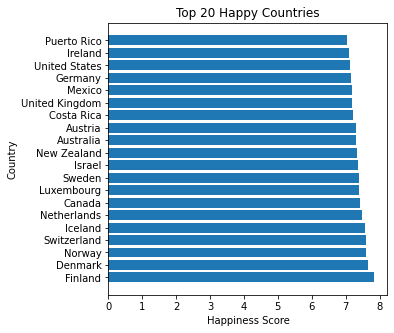

In [27]:
# plot the countries in a graph
plt.figure(figsize=(5,5))
countries = np.unique(Happiness.Country.values)
score = []
for country in np.unique(countries):
    score.append(np.max(Happiness[Happiness.Country == country]["Happiness Score"].values))
score, countries = zip(*sorted(zip(score, countries),reverse=True))
plt.barh(countries[:20],score[:20])
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.title("Top 20 Happy Countries")
plt.show()

* The continent of Europe seems to have a lot of countries with the highest happiness scores in the world. Finland has the highest happiness score amongst all countries, followed by Denmark, Norway, Switzerland, and Iceland. Overall, it seems countries in Northern Europe has the highest happiness scores compared to all othe countries and continents.
* And these are the top 20 happiest countries in the world based on this dataset

In [28]:
Min_Max2 = Happiness[Happiness['Health (Life Expectancy)']>1]
Min_Max2[['Country', 'Region', 'Health (Life Expectancy)']].groupby(['Region','Country']).max()

Health (Life Expectancy)
Region                    Country                                            
America                   Canada                                        1.039
Asia                      Hong Kong                                     1.122
                          Hong Kong S.A.R. of China                     1.137
                          Israel                                        1.029
                          Japan                                         1.088
                          Singapore                                     1.141
                          South Korea                                   1.036
Australia and New Zealand Australia                                     1.036
                          New Zealand                                   1.026
Europe                    Austria                                       1.016
                          Cyprus                                        1.042
                          France                                        1.045
                          Iceland                                       1.026
                          Italy                                         1.039
                          Luxembourg                                    1.012
                          North Cyprus                                  1.026
                          Northern Cyprus                               1.042
                          Norway                                        1.028
                          Spain                                         1.062
                          Sweden                                        1.009
                          Switzerland                                   1.052

* A lot of countries in Asia ranked highest in life expectancy. Countries like china, hong kong, singapore, and Japan. Europe, Australia and New zealand have countries that were represented in the statistics of happiest countries. Canada is also represented both in the high life expectancy and happiness score frequencies, while USA and latin american countries were not represented in the high life expectancy statistics.

* Least happiest countries

In [29]:
Min_Max3 = Happiness[Happiness['Happiness Score']<3.6]
Min_Max3[['Country', 'Region', 'Happiness Score']].groupby(['Region','Country']).min()

Happiness Score
Region                      Country                                  
Africa                      Benin                               3.340
                            Botswana                            3.467
                            Burkina Faso                        3.587
                            Burundi                             2.905
                            Central African Republic            2.693
                            Guinea                              3.507
                            Lesotho                             3.512
                            Liberia                             3.495
                            Malawi                              3.410
                            Rwanda                              3.268
                            Sierra Leone                        3.574
                            South Sudan                         2.817
                            Syria                               3.006
                            Tanzania                            3.231
                            Togo                                2.839
                            Zimbabwe                            2.995
Asia                        Afghanistan                         2.404
                            India                               3.573
                            Lebanon                             2.955
                            Yemen                               3.355
Latin America and Caribbean Haiti                               3.582

* Africa has the most countries with the lowest happiness score, followed by Asia. Afghanistan has the lowest happiness score, followed by the Central African Republic.

In [30]:
Min_Max4 = Happiness[Happiness['Health (Life Expectancy)']<0.4]
Min_Max4[['Country', 'Region', 'Health (Life Expectancy)']].groupby(['Region','Country']).min()

Health (Life Expectancy)
Region                      Country                                           
Africa                      Angola                                       0.050
                            Benin                                        0.196
                            Botswana                                     0.048
                            Burkina Faso                                 0.179
                            Burundi                                      0.145
                            Cameroon                                     0.127
                            Central African Republic                     0.000
                            Chad                                         0.000
                            Comoros                                      0.279
                            Congo                                        0.355
                            Congo (Brazzaville)                          0.282
                            Congo (Kinshasa)                             0.098
                            Djibouti                                     0.363
                            Eswatini, Kingdom of                         0.197
                            Ethiopia                                     0.331
                            Gabon                                        0.349
                            Gambia                                       0.210
                            Ghana                                        0.287
                            Guinea                                       0.188
                            Ivory Coast                                  0.045
                            Kenya                                        0.301
                            Lesotho                                      0.000
                            Liberia                                      0.230
                            Madagascar                                   0.341
                            Malawi                                       0.226
                            Mali                                         0.110
                            Mauritania                                   0.273
                            Mozambique                                   0.091
                            Namibia                                      0.262
                            Niger                                        0.167
                            Nigeria                                      0.048
                            Rwanda                                       0.319
                            Senegal                                      0.357
                            Sierra Leone                                 0.000
                            Somalia                                      0.114
                            Somaliland Region                            0.331
                            South Africa                                 0.186
                            South Sudan                                  0.158
                            Sudan                                        0.291
                            Swaziland                                    0.000
                            Tanzania                                     0.300
                            Togo                                         0.203
                            Uganda                                       0.196
                            Zambia                                       0.231
                            Zimbabwe                                     0.160
Asia                        Afghanistan                                  0.126
                            India                                        0.383
                            Iraq                                         0.381
                            Laos                                         0.330
                         

* Almost all the countries in Africa have considerably low life expectancy. Some countries have life expectancy recorded as "0". This could be a case of missing data or no information on this country's life expectancy.

* Now that we know the happiness score and life expectancy by countries and continents, let us visualize what variables or factors impact happiness score and life expectancy worldwide using histograms and scatterplots
* We would examine each dependent variable (happiness score, and life expectancy) independently.

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of Happiness Score')

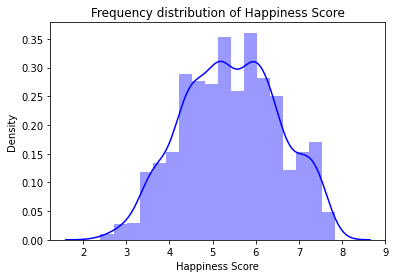

In [31]:
sns.distplot(Happiness["Happiness Score"], color="Blue")
plt.title("Frequency distribution of Happiness Score")

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of Life expectancy')

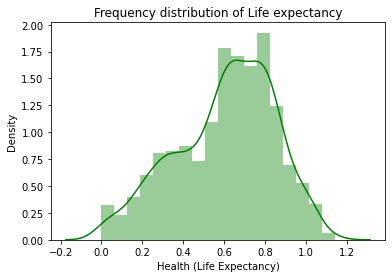

In [32]:
sns.distplot(Happiness["Health (Life Expectancy)"], color="Green")
plt.title("Frequency distribution of Life expectancy")

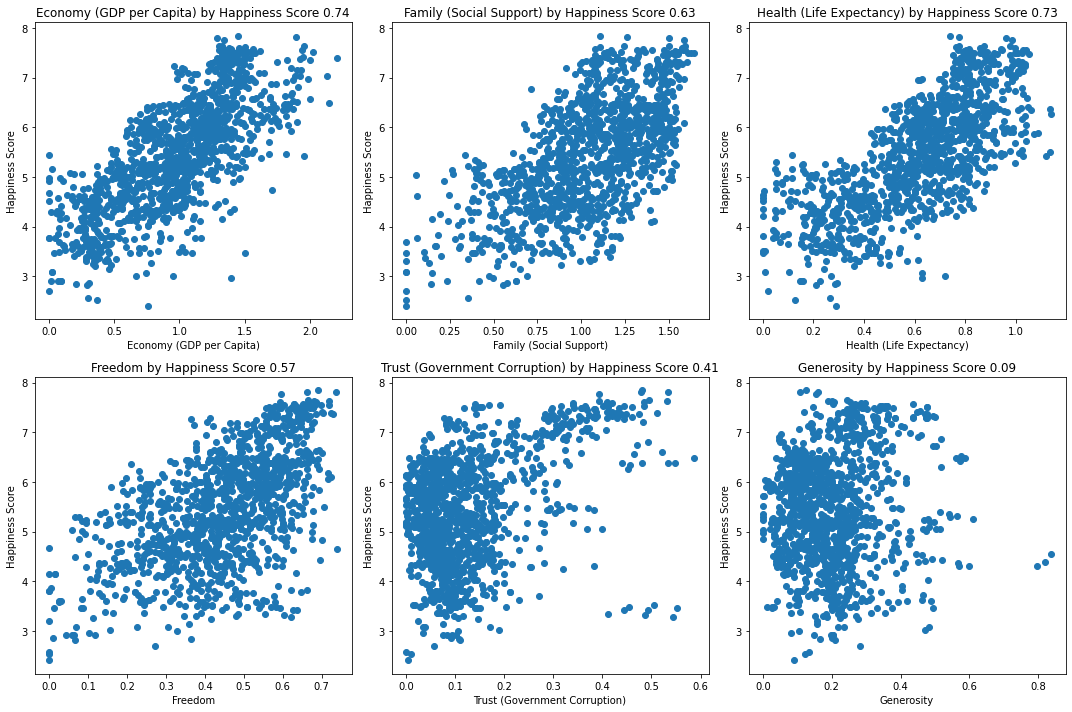

In [33]:
IVs = ["Economy (GDP per Capita)","Family (Social Support)","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
count = 1
plt.figure(figsize=(15,10))
for factor in IVs:
    plt.subplot(2,3,count)
    plt.scatter(Happiness[factor],Happiness["Happiness Score"])
    plt.xlabel(factor)
    plt.ylabel("Happiness Score")
    plt.title(factor + " by " + "Happiness Score" + " " + str(round(stats.pearsonr(Happiness[factor].values, Happiness["Happiness Score"])[0],2)))
    count = count + 1
plt.tight_layout()

* There is a strong positive linear relationship between economy, life expectancy and happiness score. Family support and freedom also have a seemingly linear relationship with happiness score but not as strong. The relationship between trust and happiness score is very weak, and generosity has no clear relationship with happiness score.

* Note: Although there are strong positive linear relationship between happiness score and some other variables, correlation does not equal causality.

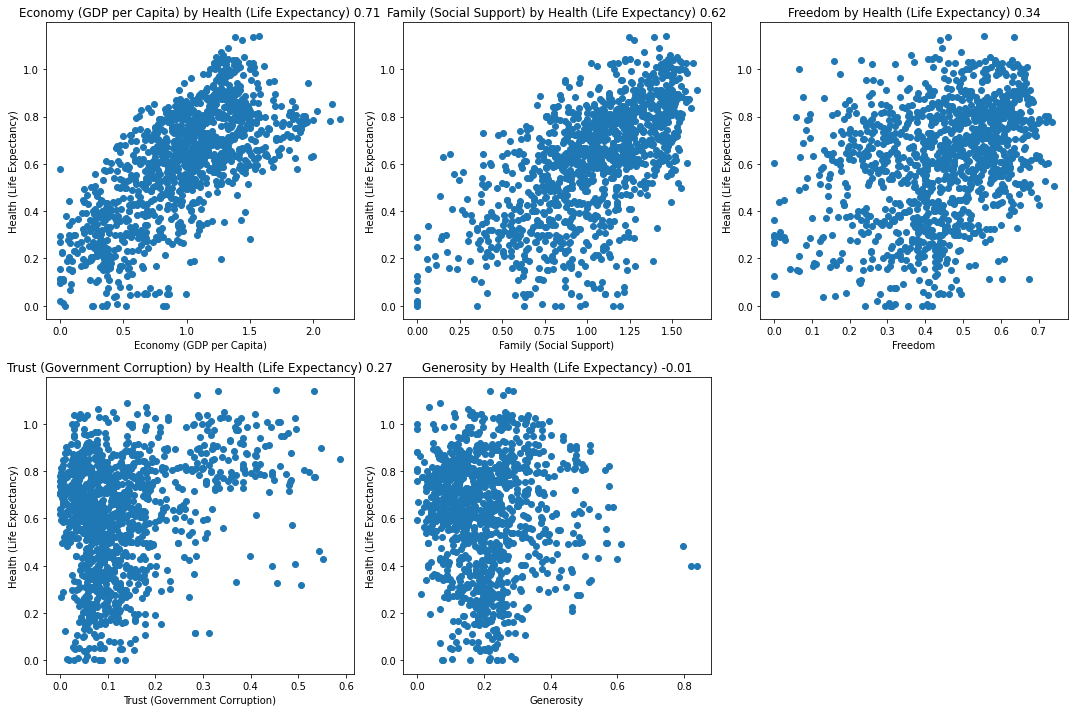

In [34]:
IVs = ["Economy (GDP per Capita)","Family (Social Support)","Freedom","Trust (Government Corruption)","Generosity"]
count = 1
plt.figure(figsize=(15,10))
for factor in IVs:
    plt.subplot(2,3,count)
    plt.scatter(Happiness[factor],Happiness["Health (Life Expectancy)"])
    plt.xlabel(factor)
    plt.ylabel("Health (Life Expectancy)")
    plt.title(factor + " by " + "Health (Life Expectancy)" + " " + str(round(stats.pearsonr(Happiness[factor].values, Happiness["Health (Life Expectancy)"])[0],2)))
    count = count + 1
plt.tight_layout()

* We already confirmed a strong linear positive relationship between happiness score and life expectancy. Economy and family has a positive linear relationship with life expectancy. Freedom and trust in government has a very weak relationship with life expectancy, and generosity has no apparent relationship with life expectancy.

* Export cleaned dataset to excel, to be able to do proper data visualization with tableau

In [35]:
Happiness.to_excel("C:/Users/aayom/OneDrive/data science/final project/Cleaned final project.xlsx", index = False)

### Visualizing each variable or factor by regions

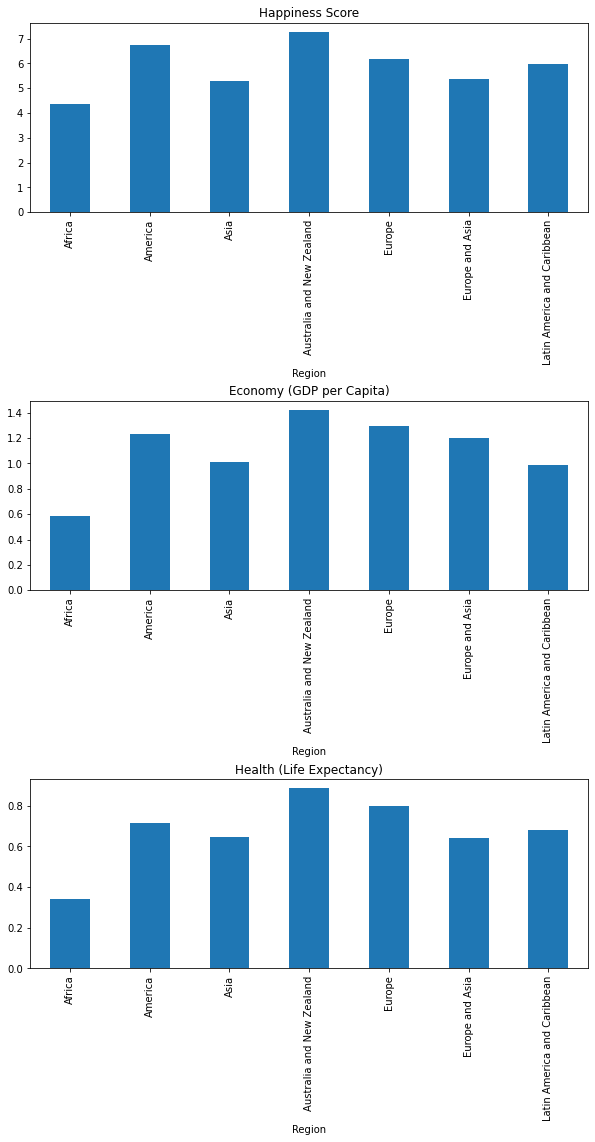

In [36]:
fig = plt.figure(figsize=(10,80))
cols = 1
rows = int(np.ceil(float(Happiness.shape[1]) / cols))

for idx, i in enumerate(['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)']):
    ax = fig.add_subplot(rows,cols, idx+1)
    plt.title(i)
    
    Happiness.groupby(by='Region').mean()[i].plot(kind='bar', ax=ax)

plt.subplots_adjust(wspace=0.1, hspace=1)

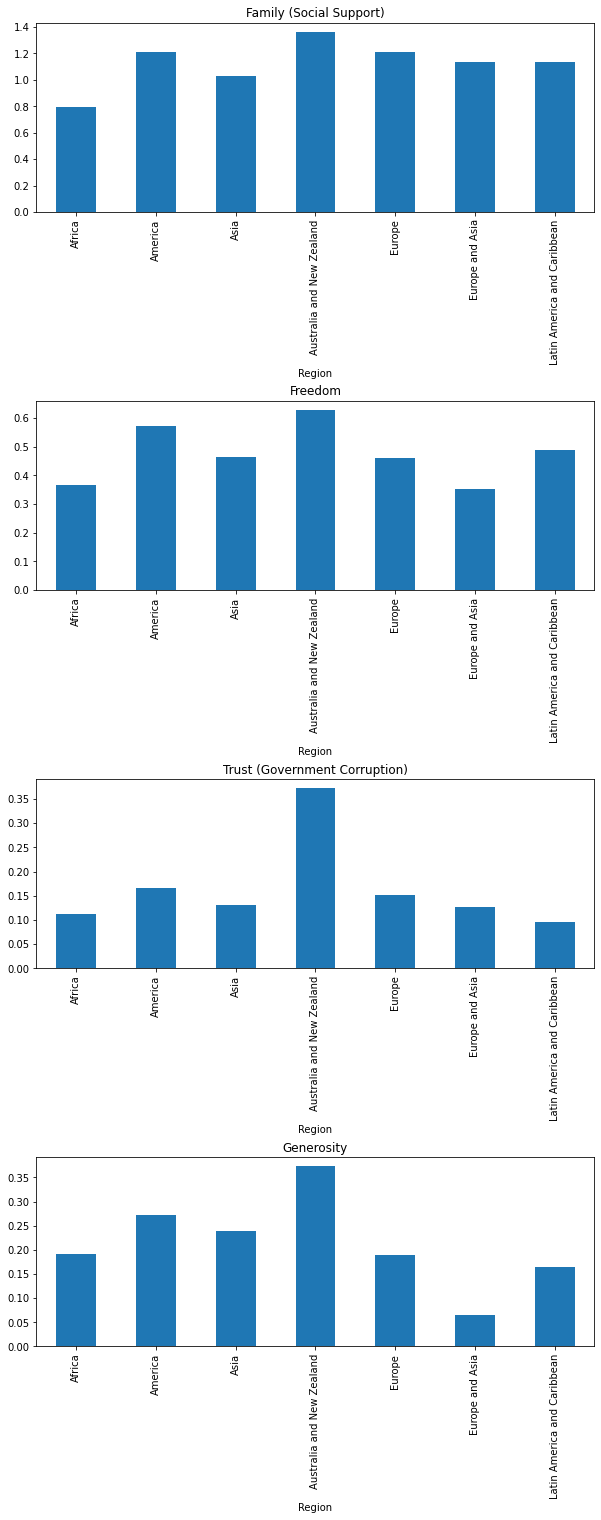

In [37]:
fig = plt.figure(figsize=(10,80))
cols = 1
rows = int(np.ceil(float(Happiness.shape[1]) / cols))

for idx, i in enumerate(['Family (Social Support)', 'Freedom','Trust (Government Corruption)', 'Generosity']):
    ax = fig.add_subplot(rows,cols, idx+1)
    plt.title(i)
    
    Happiness.groupby(by='Region').mean()[i].plot(kind='bar', ax=ax)

plt.subplots_adjust(wspace=0.1, hspace=1)

* For happiness score, life expectancy, and economy gdp per capita, America, Europe, Australia and New zealand are continents with highest mean scores/frequencies. 
* As regards social support, Africa and Asia has the lowest score.
* America, Australia and New Zealand, and the latin America and carribean have the highest mean freedom frequencies.
* Australia and New Zealand stood out with the highest mean score for trust in government and generosity.

## To check what variables are highly correlated with each other, we conduct a correlation matrix 
* The scatterplot displayed in the EDA section already showed as the correlation score of most of these variables.

In [38]:
Var_corr = Happiness[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family (Social Support)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']].copy()
Var_corr.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Economy (GDP per Capita),Health (Life Expectancy),Family (Social Support),Freedom,Generosity,Trust (Government Corruption)
Economy (GDP per Capita),1.0,0.71,0.49,0.41,-0.12,0.33
Health (Life Expectancy),0.71,1.0,0.62,0.34,-0.01,0.27
Family (Social Support),0.49,0.62,1.0,0.33,0.0075,0.13
Freedom,0.41,0.34,0.33,1.0,0.19,0.44
Generosity,-0.12,-0.01,0.0075,0.19,1.0,0.24
Trust (Government Corruption),0.33,0.27,0.13,0.44,0.24,1.0


* Economy is highly correlated with health life expectancy, moderately correlated with family and freedom, and has low correlation with trust in government and generosity.
* Health life expectancy is moderately correlated with family(social support), and has low correlation with freedom and trust in government.
* Family support has low correlation with freedom, and trust in government.
* Freedom has moderate correlation with trust(governement corruption), and low correlation with generosity.
* Generosity has low correlation with trust in government.

## DATA ANALYSIS

* Based on the data visualization tasks above showing linear relationships between our dependent variable and other variables, there are some analysis questions to be answered. Since, correlation does not equal causality, we will like to look at the influence these variables have on the outcome variable.
* We are looking at the outcome variable: Happiness score.
* Independent variables include: Economy, family, life expectancy, freedom, generosity, and trust in government.
* Analysis questions:
* 1. Does Economy, family, freedom, life expectancy, generosity, and trust in government have an influence on a country's happiness score? We will utilize a stepwise multiple linear regression model to answer this question. This regression model will help us better predict and fit our final model with the variables that are important to predict a country's happiness score.
* 2. Using machine learning (linear regression), we want to predict a country's happiness score using the influential variables from question 1.

### 1. Backward Stepwise linear regression model

In [39]:
## getting column names
x_columns = ["Economy (GDP per Capita)","Family (Social Support)", "Health (Life Expectancy)", "Freedom","Trust (Government Corruption)","Generosity"]
y = Happiness["Happiness Score"]

In [40]:
def get_stats():
    x = Happiness[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.039e+04
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                        0.00
Time:                        13:42:57   Log-Likelihood:                         -1421.0
No. Observations:                1229   AIC:                                      2854.
Df Residuals:                    1223   BIC:                                      2885.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

* This model has an adjusted R2 of 0.98. This means that this model is an excellent fit to predict the happiness score of a country, and 98% of the variance in a country's happiness score is explained by this model.
* Interpreting the coeficients, 
* 1. Economy: for every one unit increase in a country's GDP per capita, happiness score increases by 1.48
* 2. Family: for every one unit increase in social support, there is a 1.92 increase in happiness score
* 3. Freedom: for every one unit increase in a country's freedom, there is a 2.93 increase in happiness score
* 4. Generosity: for every one unit increase in generosity, happiness score increases by 2.62 units
* 5. Although trust in government is not statistically signficant, for every unit decrease in trust, there is a 0.36 decrease in happiness score.

* Looking at the summary statistics above, trust in government has a non-significant p-value, and a wide confidence interval. Therefore, we are going to try to exclude this variable and see if it improves the model fit.

In [41]:
x_columns.remove("Trust (Government Corruption)")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          1.246e+04
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                        0.00
Time:                        13:43:01   Log-Likelihood:                         -1421.3
No. Observations:                1229   AIC:                                      2853.
Df Residuals:                    1224   BIC:                                      2878.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

* Excluding or including the trust in government variable does not have an impact on the R-squared and adjusted R-squared. However, the AIC and BIC for the second model were lower than that of the first regression model. Therefore, we will be using all independent variables in model two to predict happiness score

## 2. Creating a linear model with our set of variables to predict happiness score (Machine Learning)

In [42]:
x=Happiness[x_columns]
y= Happiness["Happiness Score"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(983, 5) (983,)
(246, 5) (246,)


In [43]:
lm = LinearRegression()
lm.fit(x_train, y_train)
LinearRegression()

LinearRegression()

In [44]:
predictions = lm.predict(x_test)
predictions

array([5.15341453, 6.76361973, 5.75200709, 5.93631226, 5.33908594,
       5.08154331, 5.61158875, 6.04878671, 3.4552997 , 4.27769878,
       5.82548261, 6.09195611, 5.49579789, 6.40016986, 6.91378591,
       5.04566852, 7.06573646, 5.41555192, 6.29052492, 5.31133227,
       6.52672252, 6.73197429, 6.45416707, 4.13851001, 6.25199801,
       6.95187804, 4.20287539, 3.88860642, 5.91563429, 5.18349235,
       3.95531287, 5.5806046 , 3.35666381, 6.21487125, 4.30456141,
       4.70093757, 6.53929526, 5.4077891 , 6.04133888, 6.87851433,
       5.02699106, 6.04111038, 5.84879971, 4.50959423, 6.34670583,
       6.0108625 , 6.67255661, 5.92710181, 6.36089977, 4.71053804,
       5.05116294, 5.842156  , 4.92196348, 5.69119543, 5.407503  ,
       6.59638796, 6.10465484, 5.81771323, 4.32341296, 5.76150269,
       3.99064756, 4.46685438, 6.24521742, 3.31692752, 4.91212468,
       4.75652809, 6.44582444, 6.5046926 , 5.00141134, 5.07691594,
       6.04692514, 5.44569549, 3.49557157, 3.14765736, 7.25687

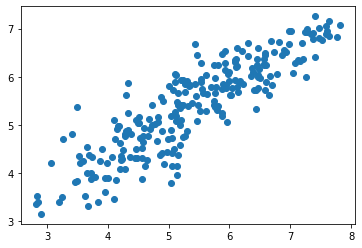

In [45]:
plt.scatter(y_test, predictions)

* Just by eyeballing the scatterplot above, the prediction accuracy looks wonderful. However, we can quantify by checking the accuracy score.

In [46]:
print("Score:", lm.score(x_test, y_test))

Score: 0.7737715883286587


* The accuracy score of our predicted happiness score is 77% based on the independent variables.

### Examining the error terms

In [47]:
## Mean Absolute Error (MAE)
metrics.mean_absolute_error(y_test, predictions)

0.45074849932476646

In [48]:
## Mean Squared Error (MSE)
metrics.mean_squared_error(y_test, predictions)

0.3074921592786679

In [49]:
## Root Mean Squared Error (RMSE)
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.5545197555350647

* All error terms are closer to zero. Therefore, this model fits well to predict happiness score.

### K-fold cross validation to ensure that bias hasn’t been introduced to your model through the split method.

In [50]:
kfold = KFold(n_splits = 10, shuffle=True)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [   0    1    3 ... 1226 1227 1228], test: [   2   43   45   47   70   74   81   82   84   85   95  109  115  117
  129  134  138  176  204  217  221  228  231  241  250  272  284  320
  337  347  353  374  379  389  396  402  411  418  421  423  433  438
  453  461  462  477  484  486  501  502  506  511  514  522  535  536
  540  551  576  587  614  619  622  624  627  633  637  642  644  651
  653  659  678  680  704  712  729  759  776  781  783  816  822  824
  833  842  852  858  873  876  879  887  904  911  929  934  937  942
  959  989  990  994  995  996 1010 1026 1033 1034 1036 1042 1047 1070
 1081 1096 1099 1130 1136 1150 1175 1178 1200 1208 1218]
train: [   0    1    2 ... 1226 1227 1228], test: [   8   15   39   46   75   80   83   88   91   98  103  118  119  141
  157  164  167  169  172  181  186  189  194  207  218  220  233  237
  239  243  267  270  285  286  307  313  351  375  377  385  386  401
  403  405  417  420  430  441  443  444  448  467  474  480  

In [51]:
print(cross_val_score(lm, x,y, cv=10))

[0.62437761 0.65577545 0.85253188 0.77315843 0.548576   0.78224084
 0.80387971 0.65308229 0.7514626  0.21707889]


* The first trained model was accurate 62% of the time, the third trained model has the highest accuracy of 85%, 4th and 6th, 7th, and 9th model has accuracy of 77%,78%,80%, and 75% while the last model has the lowest accuracy. These results also shows how the accuracy of the model might vary.

#### Summary 
* There is a strong positive relationship between happiness score and a country’s GDP per capita, life expectancy, and if or not they feel supported by family or the society
* The continents Europe, Australia, and New Zealand have the highest happiness scores and other influencing factors among other continents
* Countries in Northern Europe tops the list of happiest countries globally
* Africa has the most countries that are least happy, and Afghanistan is the country with the least happiness score
* GDP per capita, healthy life expectancy, family(social support), freedom and generosity all had a positive result/coefficient. This indicates that has the factors increase, so does happiness score and vice versa

* THANK YOU!!